# <font color="green">Introduction of Dataset</Font>

**The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.**

# <font color="green">What is the Dataset About!?</Font>

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

# <font color="green">Table of Content</font>

* [Importing Libraries](#import)
* [Loading Data](#load)
* [Data Preprocessing](#preprocess)
* [Exploratory Data Analysis](#eda)
* [Model Prediction and Evaluation](#model)

## <font color='green'>Importing Libraries<font><a class='anchor' id='import'>

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#standard Libraries
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

from collections import Counter

#dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

#model for classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


## <font color='green'>Loading Data<font><a class='anchor' id='load'>

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#lets see what is present in the data
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### <font color="blue">So Many Features! What Are They?</font>

* Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

* Triaxial Angular velocity from the gyroscope.

* A 561-feature vector with time and frequency domain variables.

* Its activity label.

* **Subject** : An identifier of the subject who carried out the experiment.


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
# how many records are available for each subjects
train.subject.value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

## <font color='green'>Data Preprocessing<font><a class='anchor' id='preprocess'>

#### Checking for Duplicates

In [6]:
print('Number of duplicates in train : ',sum(train.duplicated()))
print('Number of duplicates in test  : ',sum(test.duplicated()))

Number of duplicates in train :  0
Number of duplicates in test  :  0


### Checking for Missing Values

In [7]:
print('Number of Missing values in train : ',train.isna().values.sum())
print('Number of Missing values in test  : ',test.isna().values.sum())

Number of Missing values in train :  0
Number of Missing values in test  :  0


### Checking for class imbalance

In [8]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

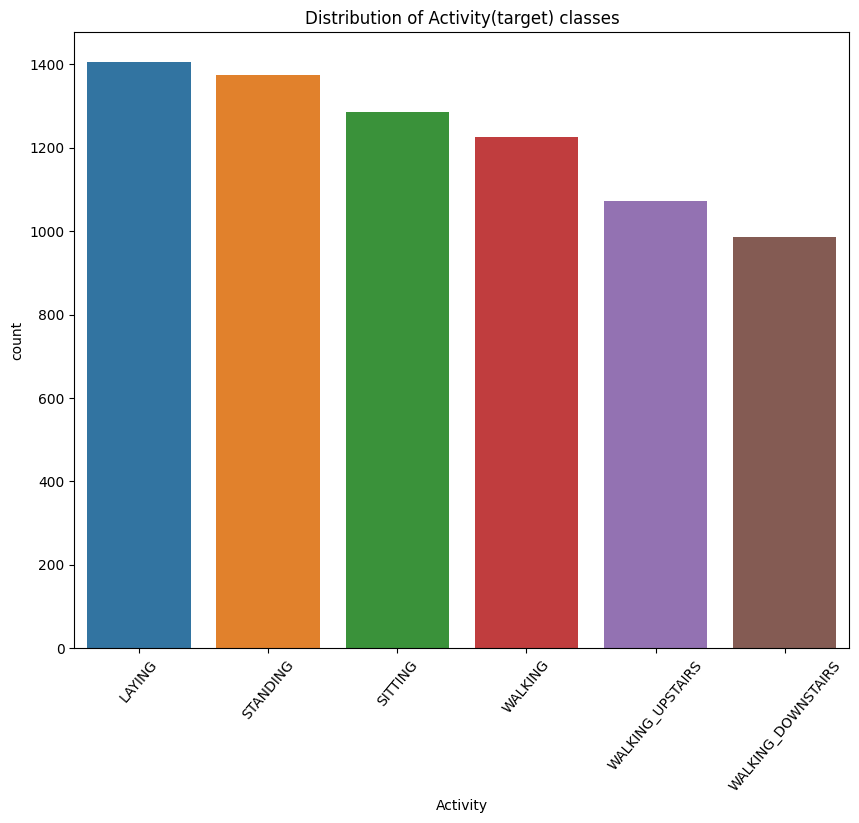

In [9]:
sns.countplot(x=train['Activity'],data=train,order =train['Activity'].value_counts().index)
plt.title('Distribution of Activity(target) classes')
plt.xticks(rotation=50)
plt.show()


There is almost same number of observation available for each label, Thus it is safe to data that data is not imbalanced

## <font color='green'>Exploratory Data Analysis<font><a class='anchor' id='eda'>

In [10]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [11]:
# Cleaning the main parameter:-
# [col.split('-')[0].split('(')[0] for col in train.columns]

#Counting how much parameter does each feature has
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),orient = 'index').rename(columns={0:'count'}).sort_values('count',ascending = False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Mainly there are 'acceleration' and 'gyroscope' features. A few 'gravity' features are there as well.

Based on the common nature of activities we can broadly put them in two categories.
- **Static and dynamic activities : **
    - SITTING, STANDING, LAYING can be considered as static activities with no motion involved
    - WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved    
    
Let's consider **tBodyAccMag-mean()** feature to differentiate among these two broader set of activities.



#### tBodyAccMag-mean feature analysis

Text(0.1, 9, 'Dynamic Activities')

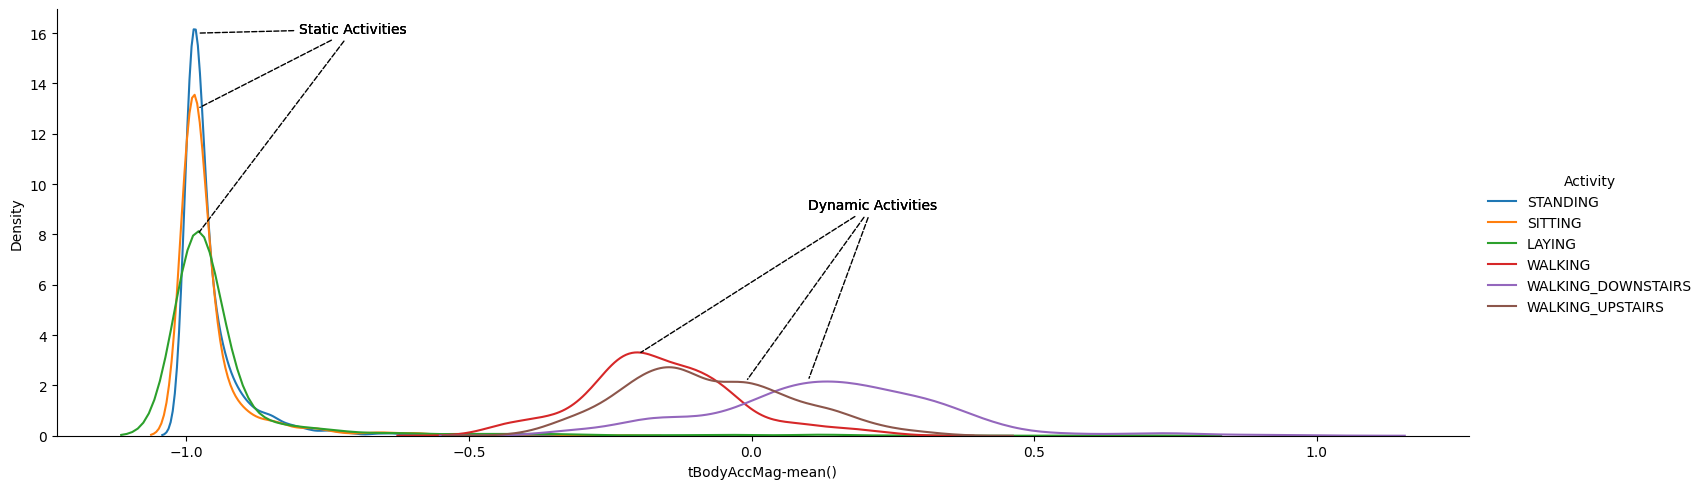

In [17]:
facetGrid = sns.FacetGrid(train,hue='Activity',height=5,aspect=3)
facetGrid.map(sns.distplot,'tBodyAccMag-mean()',hist = False).add_legend()

plt.annotate("Static Activities", xy = (-.98, 8), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 13), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 16), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

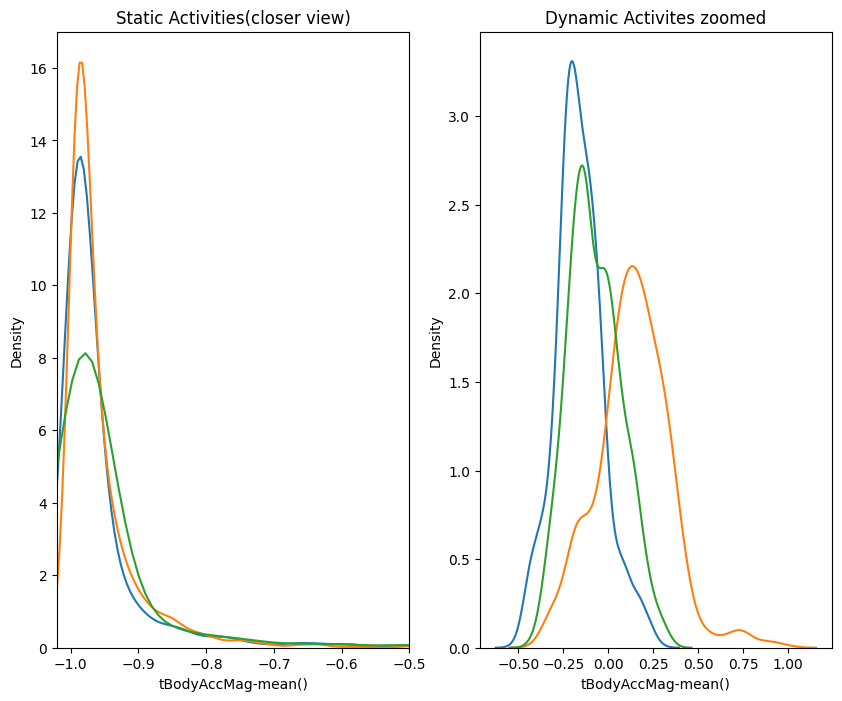

In [25]:
#breaking the graph
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 17])

plt.subplot(1,2,2)
plt.title("Dynamic Activites zoomed")
sns.distplot(train[train['Activity']=="WALKING"]['tBodyAccMag-mean()'],hist=False,label='WALKING')
sns.distplot(train[train['Activity']=='WALKING_DOWNSTAIRS']['tBodyAccMag-mean()'],hist=False,label='WALKING DOWNSTAIRS')
sns.distplot(train[train['Activity']=='WALKING_UPSTAIRS']['tBodyAccMag-mean()'],hist=False,label='WALKING UPSTAIRS')

plt.show()


We can clearly conclued that: 
- Activities with `tBodyAccMag-mean()` is greater than -0.50 are `Dynamic Activities`
- Activities with `tBodyAccMag-mean()` is less than -0.50 are `Static Activities`

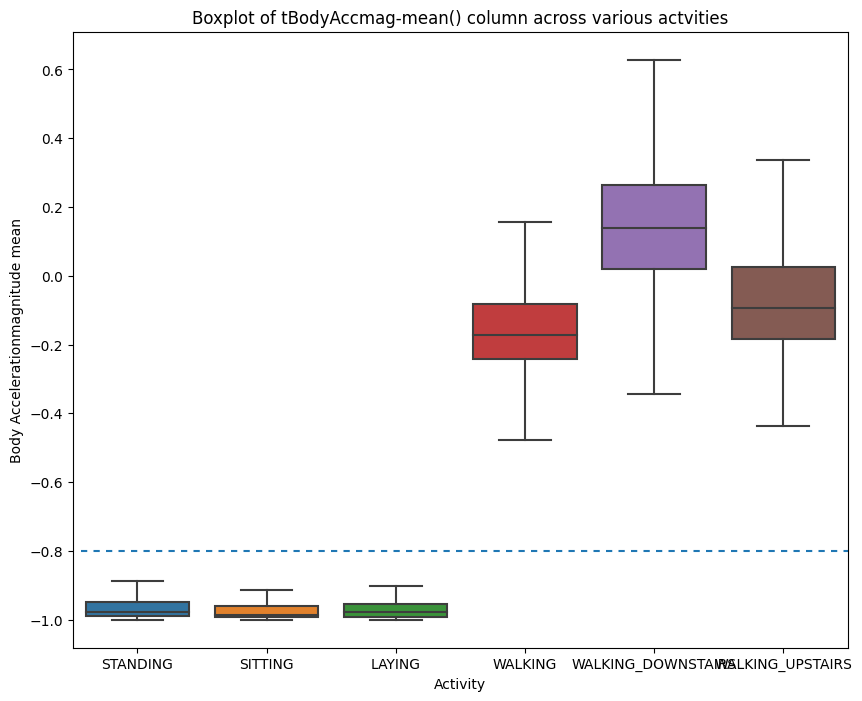

In [27]:
sns.boxplot(x='Activity',y='tBodyAccMag-mean()',data=train, showfliers=False)
plt.ylabel("Body Accelerationmagnitude mean")
plt.title('Boxplot of tBodyAccmag-mean() column across various actvities')
plt.axhline(y=-0.8,xmin=0.01,dashes=(3,3))
plt.show()

#### Analysing  the angle between X-axis and gravityMean feature

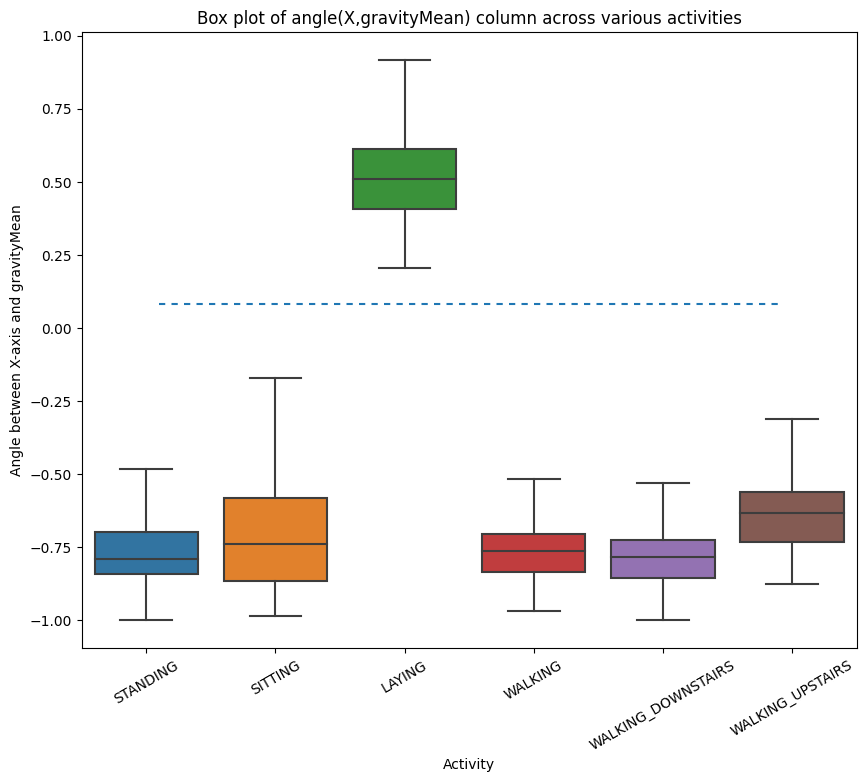

In [28]:
sns.boxplot(x='Activity',y='angle(X,gravityMean)',data=train,showfliers = False)
plt.axhline(y=0.08,xmin=0.1,xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()

According the the above Boxplot, angle(X,gravityMean) totally differentiates `LAYING` activity from the rest, As while `LAYING` the  X-axis(body's back) whould be perpendicular to the gravitaional axis
So we can come  up with condition as
```
if(angle(X,gravityMean)>0.01):
    Activity = "LAYING"
else:
    Activity = "others"
```

#### Analysing  the angle between Y-axis and gravityMean feature

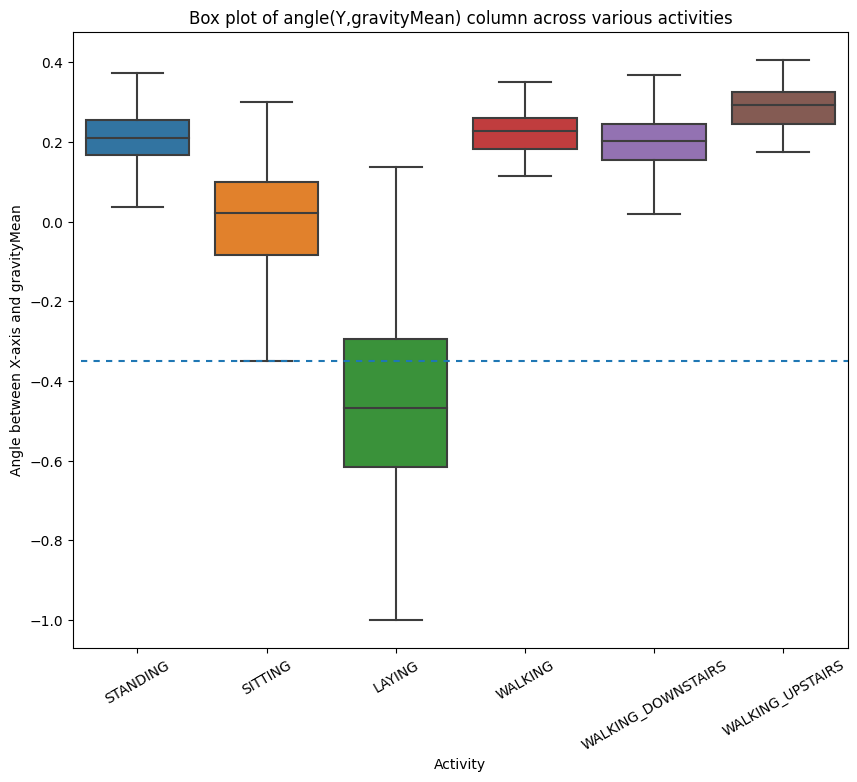

In [30]:
sns.boxplot(x='Activity',y='angle(Y,gravityMean)',data=train,showfliers = False)
plt.axhline(y=-0.35,xmin=0.01,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()

### Visualizing data using PCA

Using PCA data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unqiue features, using PCA let's visualize it to a 2D space.

In [31]:
X_pca = train.drop(['subject','Activity'],axis=1)
pca = PCA(n_components=2,random_state=0).fit_transform(X_pca)

In [32]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

<Axes: >

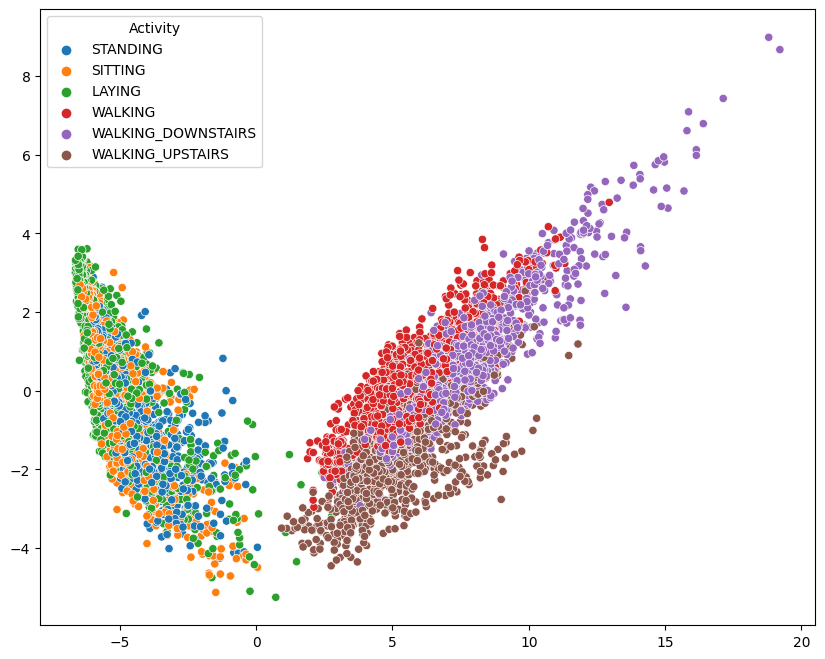

In [34]:
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=train['Activity'])

### Visulizing Data using TSNE

Using t-SNE data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unqiue features, using t-SNE let's visualize it to a 2D space.

In [35]:
X_tsne = train.drop(['subject','Activity'],axis=1)
tsne = TSNE(n_components=2,random_state=0,n_iter=1000).fit_transform(X_tsne)

In [36]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

<Axes: >

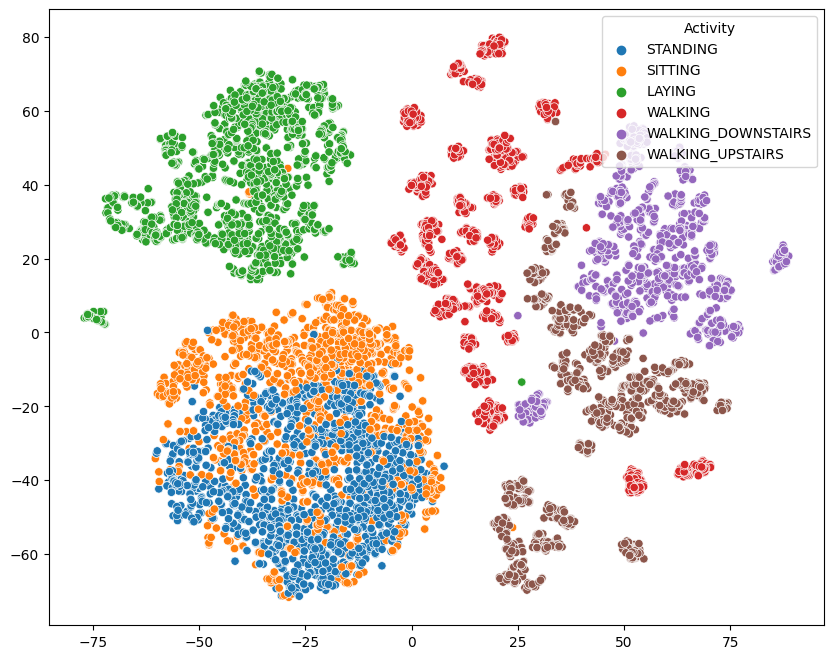

In [38]:
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=train['Activity'])

from the above scatter plot we can see tha TSNE gives a better classification of activities rather the PCA

## <font color='green'>Model Selection and Evalulation<font><a class='anchor' id='model'>

seperating X,Y label

In [39]:
X_train = train.drop(['Activity','subject'],axis=1)
y_train = train.Activity

X_test = test.drop(['Activity','subject'],axis=1)
y_test = test.Activity


In [40]:
print('Shape of Train data: ',X_train.shape)
print('Shape of Test data: ',X_test.shape)

Shape of Train data:  (7352, 561)
Shape of Test data:  (2947, 561)


#### <font  color='blue'>Logistic regression  with Hyperparameter tuning and cross validation</font>

In [56]:
#hyperparameter tunning will look for best parameters for your model
parameters = {'max_iter':[100,200,500]}
lr_classifier = LogisticRegression()

#training model based on different batches(Kfold method)(cross validating)
lr_classifier_rs = RandomizedSearchCV(lr_classifier,param_distributions=parameters, cv=4,random_state=42)
lr_classifier_rs.fit(X_train,y_train)
y_pred_lr=lr_classifier_rs.predict(X_test)

In [57]:
lr_acc = accuracy_score(y_true=y_test,y_pred=y_pred_lr)
print('Accuracy using Logistic Regression: ',lr_acc)

Accuracy using Logistic Regression:  0.9613165931455717


In [59]:
#function for plotting confusion matrix
def plt_confusionMatrix(cm,label):
    fig,ax=plt.subplots()
    im = ax.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    ax.figure.colorbar(im,ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=label, yticklabels=label,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    

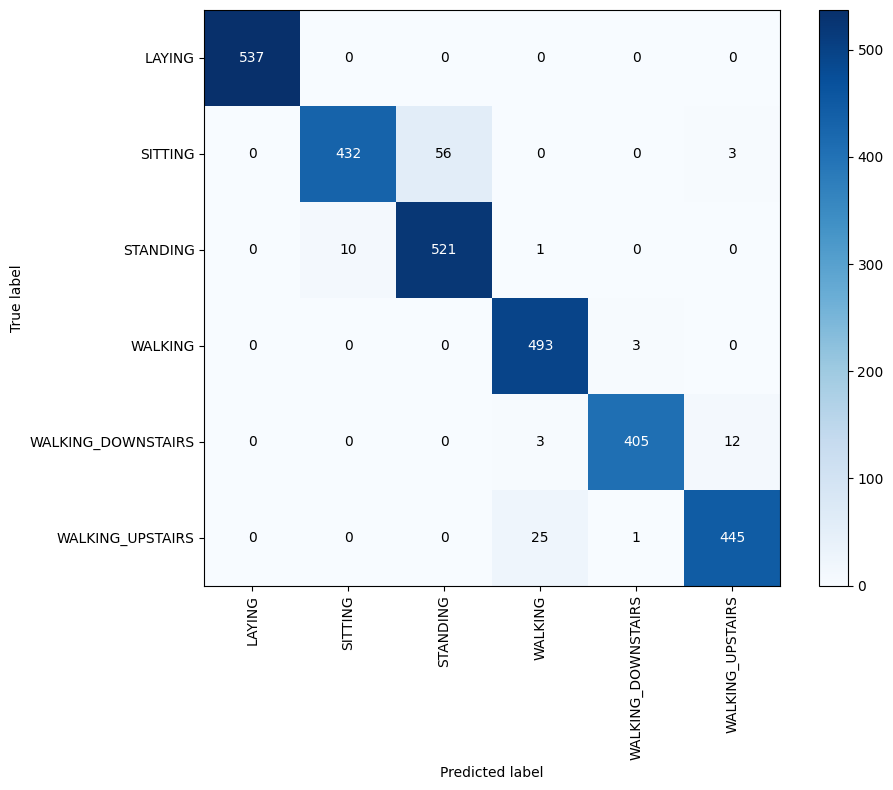

In [60]:
cm=confusion_matrix(y_test.values,y_pred_lr)
plt_confusionMatrix(cm,np.unique(y_pred_lr))

In [61]:
#function to get the best random search parameters
def get_best_parma(model):
    print('Best set of parameteres : ',model.best_params_)

In [63]:
get_best_parma(lr_classifier_rs)

Best set of parameteres :  {'max_iter': 500}


#### <font color='blue'>SVM model with Hyperparameter tuning and cross validation</font>

In [65]:
#defing parameteres
parameters = {'kernel':['linear','rbf','poly','sigmoid'],
              'C':[100, 50]
              }
svm_rs = RandomizedSearchCV(SVC(),param_distributions=parameters,cv=4,random_state=42)
svm_rs.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [66]:
y_pred_svm = svm_rs.predict(X_test)

In [68]:
svm_acc = accuracy_score(y_true=y_test,y_pred=y_pred_svm)
print('Accuracy using Support Vector Machine: ',svm_acc)

Accuracy using Support Vector Machine:  0.9653885307091958


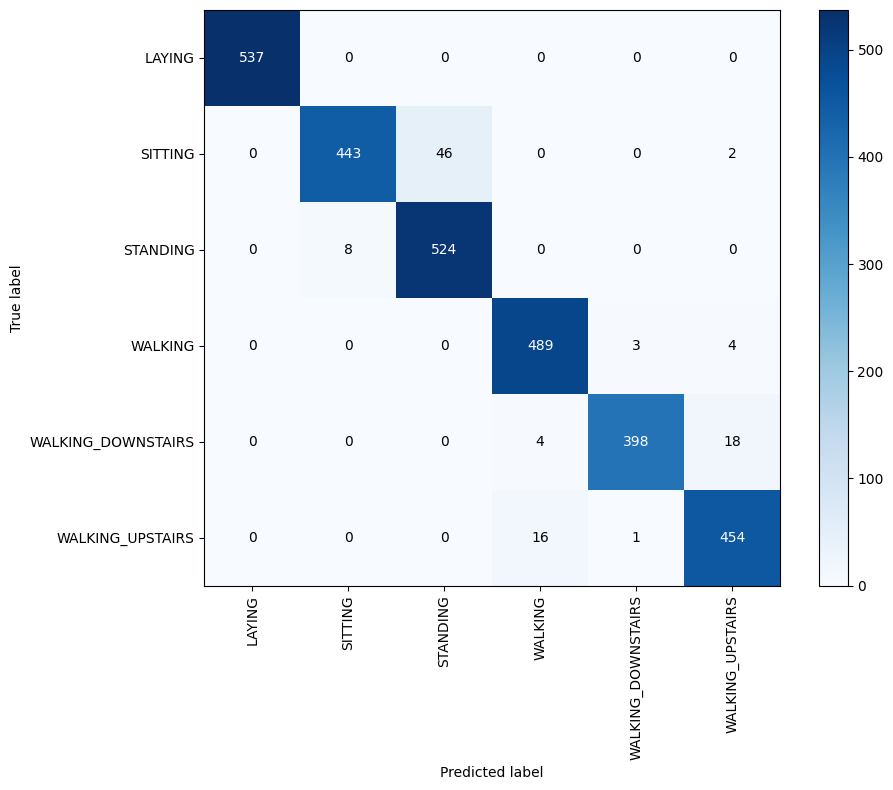

In [69]:
cm=confusion_matrix(y_test.values,y_pred_svm)
plt_confusionMatrix(cm,np.unique(y_pred_svm))

In [70]:
get_best_parma(svm_rs)

Best set of parameteres :  {'kernel': 'rbf', 'C': 100}


#### <font color='blue'>Decision Tree Model with Hyperparameter tuning and cross validation</font>

In [77]:
parameters = {'max_depth':np.arange(2,16,2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42)
dt_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14])},
                   random_state=42)

In [78]:
get_best_parma(dt_classifier_rs)

Best set of parameteres :  {'max_depth': 8}


In [79]:
y_pred_dt = dt_classifier_rs.predict(X_test)

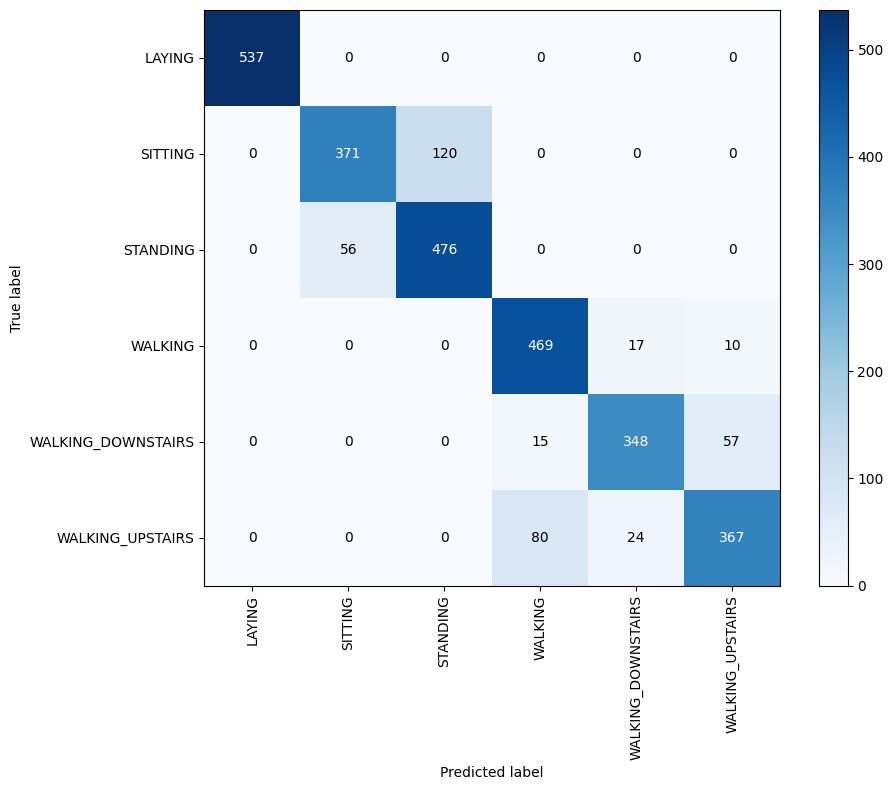

In [80]:
cm = confusion_matrix(y_true=y_test.values,y_pred=y_pred_dt)
plt_confusionMatrix(cm,np.unique(y_pred_dt))

In [81]:
dt_acc = accuracy_score(y_true=y_test,y_pred=y_pred_dt)
print('Accuracy using Support Vector Machine: ',dt_acc)

Accuracy using Support Vector Machine:  0.8713946386155412


#### <font color='blue'>Random Forest with Hyperparameter tuning and cross validation</font>

In [82]:
parameters = {
    'n_estimators':np.arange(20, 101, 10), 
    'max_depth': np.arange(2, 20, 2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier,param_distributions=parameters,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [83]:
get_best_parma(rf_classifier_rs)

Best set of parameteres :  {'n_estimators': 90, 'max_depth': 16}


In [84]:
y_pred_rf = rf_classifier_rs.predict(X_test)

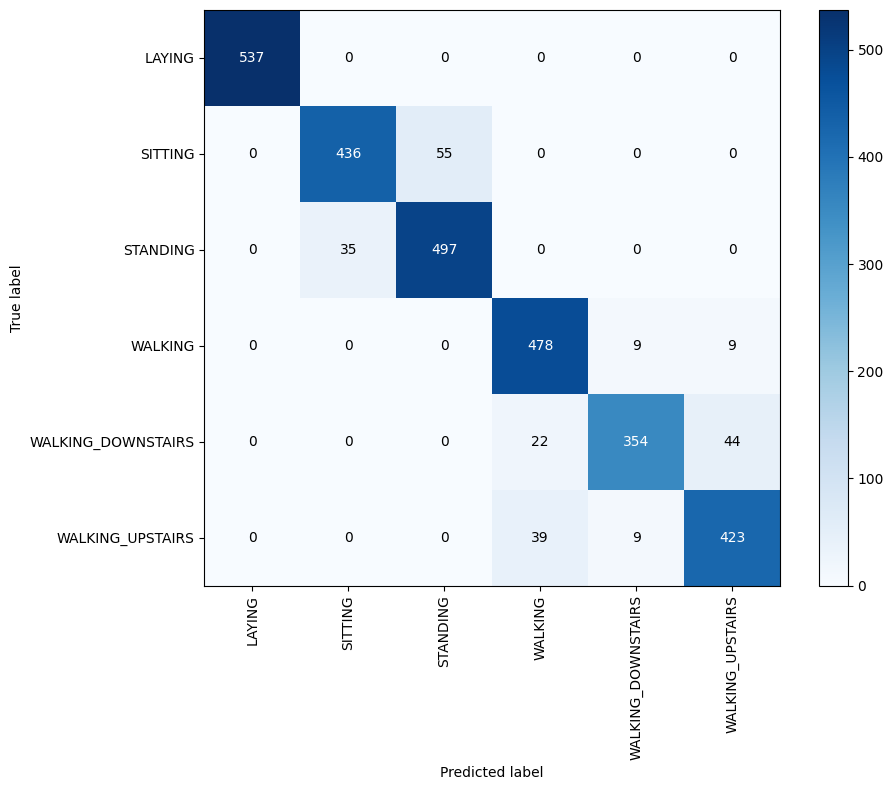

In [85]:
cm = confusion_matrix(y_true=y_test.values,y_pred=y_pred_rf)
plt_confusionMatrix(cm,np.unique(y_pred_rf))

In [86]:
rf_acc = accuracy_score(y_true=y_test,y_pred=y_pred_rf)
print('Accuracy using Support Vector Machine: ',rf_acc)

Accuracy using Support Vector Machine:  0.9246691550729556
